In [18]:
# Load CSV file in pandas
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('iowa_vodka.csv')

C:\Users\valea\AppData\Local\Temp\ipykernel_20676\1600261870.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('iowa_vodka.csv')


In [3]:
data.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S03399000002,2012-01-03,3762,WINE AND SPIRITS GALLERY,7690 HICKMAN RD,WINDSOR HEIGHTS,50322,NaN,77.0,POLK,...,37348,PHILLIPS VODKA,6,1750,7.31,10.97,6,65.82,10.50,2.77
1,S03389300052,2012-01-03,3858,HAROLDS JACK N JILL / DAVENPORT,6723 NW BLVD UNIT 2,DAVENPORT,52806,POINT (-90.609747 41.589369),82.0,SCOTT,...,34870,STOLI RAZBERI (RASPBERRY),12,750,12.24,18.37,1,18.37,0.75,0.20
2,S03371300002,2012-01-03,4443,PALO MINI MART,1204 1ST ST,PALO,52324,POINT (-91.795808 42.070316),57.0,LINN,...,34422,GREY GOOSE VODKA,6,1000,21.77,32.66,6,195.96,6.00,1.59
3,S03393400035,2012-01-03,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002,POINT (-90.741064 42.516633),31.0,DUBUQUE,...,36886,MCCORMICK VODKA,12,750,3.30,4.96,12,59.52,9.00,2.38
4,S03401600100,2012-01-03,2522,HY-VEE WINE AND SPIRITS / SPIRIT LAK,HWY 9 & 71,SPIRIT LAKE,51360,NaN,30.0,DICKINSON,...,36904,MCCORMICK VODKA PET,24,375,1.76,2.63,6,15.78,2.25,0.59


In [4]:
# total rows and columns
data.shape

(7016736, 24)

In [5]:
# check the data types
data.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [6]:
# finding unique number stores, cities, countries, categories, vendor numbers, item numbers,
print(data['Store Number'].nunique())
print(data['Store Name'].nunique())
print(data['City'].nunique())
print(data['County'].nunique())
print(data['County Number'].nunique())
print(data['Category'].nunique())
print(data['Vendor Number'].nunique())
print(data['Item Number'].nunique())
print(data['Item Description'].nunique())

2984
3177
483
99
99
11
173
2121
1778


In [19]:
# impute county missing values with the mode looking at the city
data['County'] = data.groupby('City')['County'].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
print(f'County: {data["County"].isnull().sum()}')
print(data["County"].isnull().sum()/7016736)

County: 21126
0.0030108016034805928


In [20]:
# drop rows were county is still missing
data = data.dropna(subset=['County'])

In [21]:
# change datatypes of column date
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
# Create column day of week
data['DayOfWeek'] = data['Date'].dt.day_name()

In [23]:
# Create column weekend (boolean)
data['Weekend'] = data['DayOfWeek'].isin(['Saturday', 'Sunday'])

In [24]:
# Create column month
data['Month'] = data['Date'].dt.month_name()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995610 entries, 0 to 7016735
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            int64         
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost     

In [25]:
# min and max date
data['Date'].min(), data['Date'].max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2023-11-30 00:00:00'))

In [26]:
# Create column holiday, taking into account the holidays in the US (New Year's Day, Independence Day, Thanksgiving, Christmas, labor day, memorial day) from 2012 to 2023
holidays = ['2012-01-01', '2012-07-04', '2012-11-22', '2012-12-25', '2013-01-01', '2013-07-04', '2013-11-28', '2013-12-25', '2014-01-01', '2014-07-04', '2014-11-27', '2014-12-25', '2015-01-01', '2015-07-04', '2015-11-26', '2015-12-25', '2016-01-01', '2016-07-04', '2016-11-24', '2016-12-25', '2017-01-01', '2017-07-04', '2017-11-23', '2017-12-25', '2018-01-01', '2018-07-04', '2018-11-22', '2018-12-25', '2019-01-01', '2019-07-04', '2019-11-28', '2019-12-25', '2020-01-01', '2020-07-04', '2020-11-26', '2020-12-25', '2021-01-01', '2021-07-04', '2021-11-25', '2021-12-25', '2022-01-01', '2022-07-04', '2022-11-24', '2022-12-25', '2023-01-01', '2023-07-04', '2023-11-23', '2023-12-25']
data['Holiday'] = data['Date'].isin(holidays)

In [49]:
# Save again csv file
data.to_csv('iowa_vodka.csv', index=False)
#no need to rerun before this since the file is already updated 

In [2]:
# Group data by store number and display the store name/names per store number
store = data.groupby('Store Number')['Store Name']
store.first()

Store Number
2106          HILLSTREET NEWS AND TOBACCO
2113                       JAMBOREE FOODS
2130                 SYCAMORE CONVENIENCE
2132                     SPIRITS AND SUCH
2152                   DUGANS SUPERMARKET
                       ...               
10298            CASEY'S #4308 / CHARITON
10300           ESSENTIALS / CEDAR RAPIDS
10301    FLOYD FOOD AND FUEL / SIOUX CITY
10302     SIOUX-PER CENTER / SIOUX CENTER
10303              DECORAH MART / DECORAH
Name: Store Name, Length: 2983, dtype: object

In [18]:
data

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),DayOfWeek,Weekend,Month,Holiday
0,S03399000002,2012-01-03,3762,WINE AND SPIRITS GALLERY,7690 HICKMAN RD,WINDSOR HEIGHTS,50322,NaN,77.0,POLK,...,7.31,10.97,6,65.82,10.50,2.77,Tuesday,False,January,False
1,S03389300052,2012-01-03,3858,HAROLDS JACK N JILL / DAVENPORT,6723 NW BLVD UNIT 2,DAVENPORT,52806,POINT (-90.609747 41.589369),82.0,SCOTT,...,12.24,18.37,1,18.37,0.75,0.20,Tuesday,False,January,False
2,S03371300002,2012-01-03,4443,PALO MINI MART,1204 1ST ST,PALO,52324,POINT (-91.795808 42.070316),57.0,LINN,...,21.77,32.66,6,195.96,6.00,1.59,Tuesday,False,January,False
3,S03393400035,2012-01-03,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002,POINT (-90.741064 42.516633),31.0,DUBUQUE,...,3.30,4.96,12,59.52,9.00,2.38,Tuesday,False,January,False
4,S03401600100,2012-01-03,2522,HY-VEE WINE AND SPIRITS / SPIRIT LAK,HWY 9 & 71,SPIRIT LAKE,51360,NaN,30.0,DICKINSON,...,1.76,2.63,6,15.78,2.25,0.59,Tuesday,False,January,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016731,INV-64781400039,2023-11-30,4147,FAREWAY STORES #974 / CEDAR FALLS,214 N MAGNOLIA DR,CEDAR FALLS,50613.0,POINT (-92.475827994 42.539017006),NaN,BLACK HAWK,...,9.50,14.25,1,14.25,0.75,0.19,Thursday,False,November,False
7016732,INV-64771600048,2023-11-30,2633,HY-VEE #3 / BDI / DES MOINES,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.594780971 41.554268986),NaN,POLK,...,19.99,29.99,6,179.94,10.50,2.77,Thursday,False,November,False
7016733,INV-64776200022,2023-11-30,6304,WORLD LIQUOR & TOBACCO + VAPORS / AMES,111 DUFF AVENUE,AMES,50010.0,POINT (-93.610934994 42.023588005),NaN,STORY,...,8.00,12.00,1,12.00,0.75,0.19,Thursday,False,November,False
7016734,INV-64777100002,2023-11-30,4235,FAREWAY STORES #395 / WEBSTER CITY,942 2ND ST,WEBSTER CITY,50595.0,POINT (-93.827403008 42.469141019),NaN,HAMILTON,...,11.50,17.25,6,76.50,10.50,2.77,Thursday,False,November,False


In [19]:
# Filter stores that have more than one name associated with them (number)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995610 entries, 0 to 7016735
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            int64         
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost     

In [ ]:
# Group by 'store_number' and get the number of unique 'store_name' for each 'store_number'
store_count = data.groupby('Store Number')['Store Name'].nunique()

# Filter out the store numbers with more than one unique name
stores_with_multiple_names = store_count[store_count > 1]

# Print the store numbers and the corresponding number of unique names
print("Store Numbers with Different Names:")
print(stores_with_multiple_names)

In [ ]:

# Fill missing zip codes with the mode of zip codes within each store number group
data['Zip Code'] = data.groupby('Store Number')['Zip Code'].transform(lambda x: x.fillna(x.mode().iloc[0]))
print(data['Zip Code'].isnull().sum())


In [31]:


data['County Number'] = data.groupby('County')['County Number'].transform(lambda x: x.fillna(x.mode()[0]))


In [ ]:

vendor_count = data.groupby('Vendor Number')['Vendor Name'].nunique()


vendor_with_multiple_names = vendor_count[vendor_count > 1]

print("Vendor Numbers with Different Names:")
print(vendor_with_multiple_names)

In [ ]:

rows_with_multiple_names = data[data['Vendor Number'].isin(vendor_with_multiple_names[vendor_with_multiple_names >= 2].index)]

print(rows_with_multiple_names[['Vendor Name', 'Vendor Number']])

In [ ]:

pd.set_option('display.max_rows', None)
data[data['Vendor Number'].isin(vendor_with_multiple_names.index)].sort_values(by='Vendor Number')[['Vendor Number', 'Vendor Name']].drop_duplicates()

In [47]:

data['Vendor Name'] = data.groupby('Vendor Number')['Vendor Name'].transform(lambda x: x.iloc[-1])

In [ ]:

data.to_csv('iowa_vodka.csv', index=False)


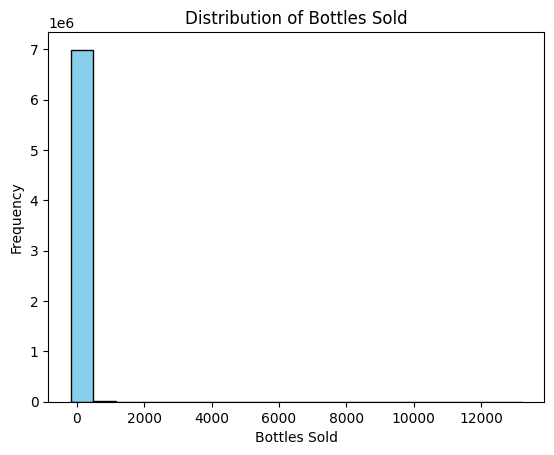

In [50]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data['Bottles Sold'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Bottles Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Bottles Sold')
plt.show()


In [52]:
data['Bottles Sold'].value_counts()

 12       2138635
 6        1465554
 2         707227
 24        568563
 3         567403
 1         566279
 4         335658
 48        139129
 5          92879
 18         73635
 36         62900
 10         49324
 8          38997
 60         38511
 30         23781
 72         17982
 120        13316
 96         11873
 7           9833
 180         5601
 150         5470
 240         5225
 300         4926
 9           4873
 84          4749
 144         3458
 15          3279
 42          3184
 20          3171
 90          3167
 108         1625
 360         1591
 54          1420
 600         1390
 660         1375
 16          1294
 192         1004
 168          964
 14           963
 11           917
 132          848
 156          591
 480          591
 288          501
 66           499
 78           453
 210          443
 216          423
 13           406
 270          299
 540          293
 25           291
-12           289
 102          277
 720          273
 138      

: 